In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')
print(df)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

In [3]:
df.shape

(18249, 14)

The given datasset consists of 18249 rows and 14 columns

In [4]:
#Checking column names

df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

The data doesnot have any  null values

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2016-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,GreatLakes
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [9]:
#In the given dataset date is a object type so changing into the date format


df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [10]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [11]:
#Rename the column

df=df.rename(columns={'4046':'PLU 4046','4225':'PLU 4225','4770':'PLU 4770'})

In [12]:
df.head()

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


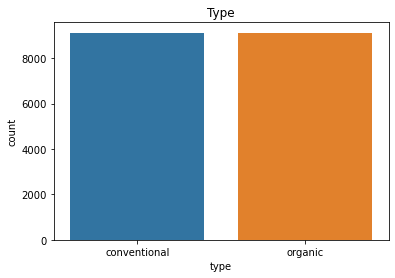

In [13]:
#Visualization

sns.countplot(x="type",data=df)
plt.title("Type")
plt.show()

There are  two types of avacado 1.conventional and 2.organic

In [14]:
#mean of price every year

df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

2017 year is the highest year where price is high

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

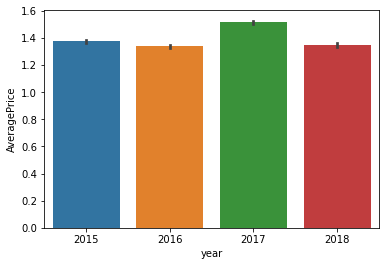

In [15]:
sns.barplot(x='year',y='AveragePrice',data=df)

average price is more in year 2017

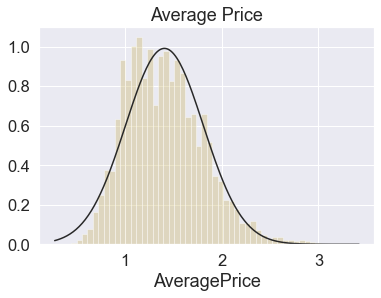

In [16]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
sns.distplot(a=df.AveragePrice,kde=False,color='y',fit=norm)
plt.title("Average Price")
plt.show()

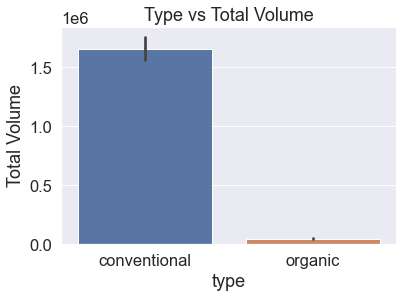

In [17]:
#checking which conventional type having more average price


sns.barplot(x='type',y='Total Volume',data=df)
plt.title("Type vs Total Volume")
plt.show()

The graph shows the organic type volume is very less compare to conventional type

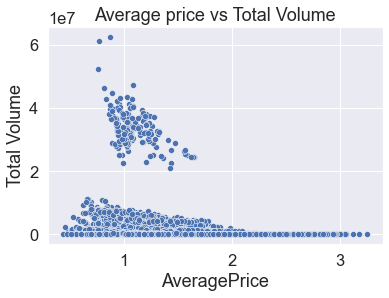

In [18]:
sns.scatterplot(x='AveragePrice',y='Total Volume',data=df)
plt.title("Average price vs Total Volume")
plt.show()

As volume increases the average price decreases

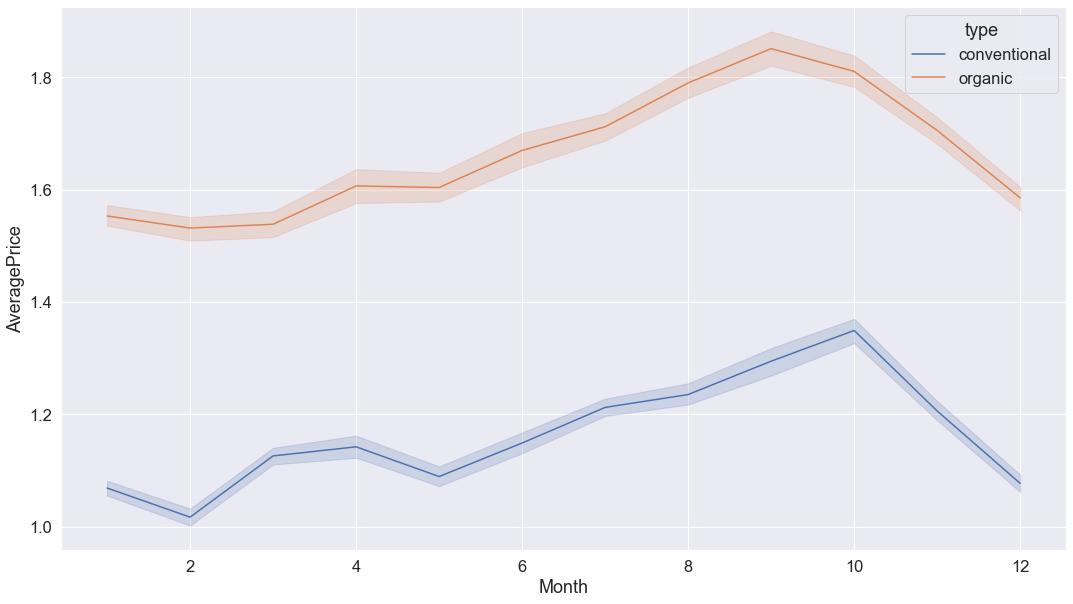

In [19]:
#How Avg price changes monthly for both conventional and organic
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

As the graph shows both conventional and organic gives hike in the month of 8-10 

In [20]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

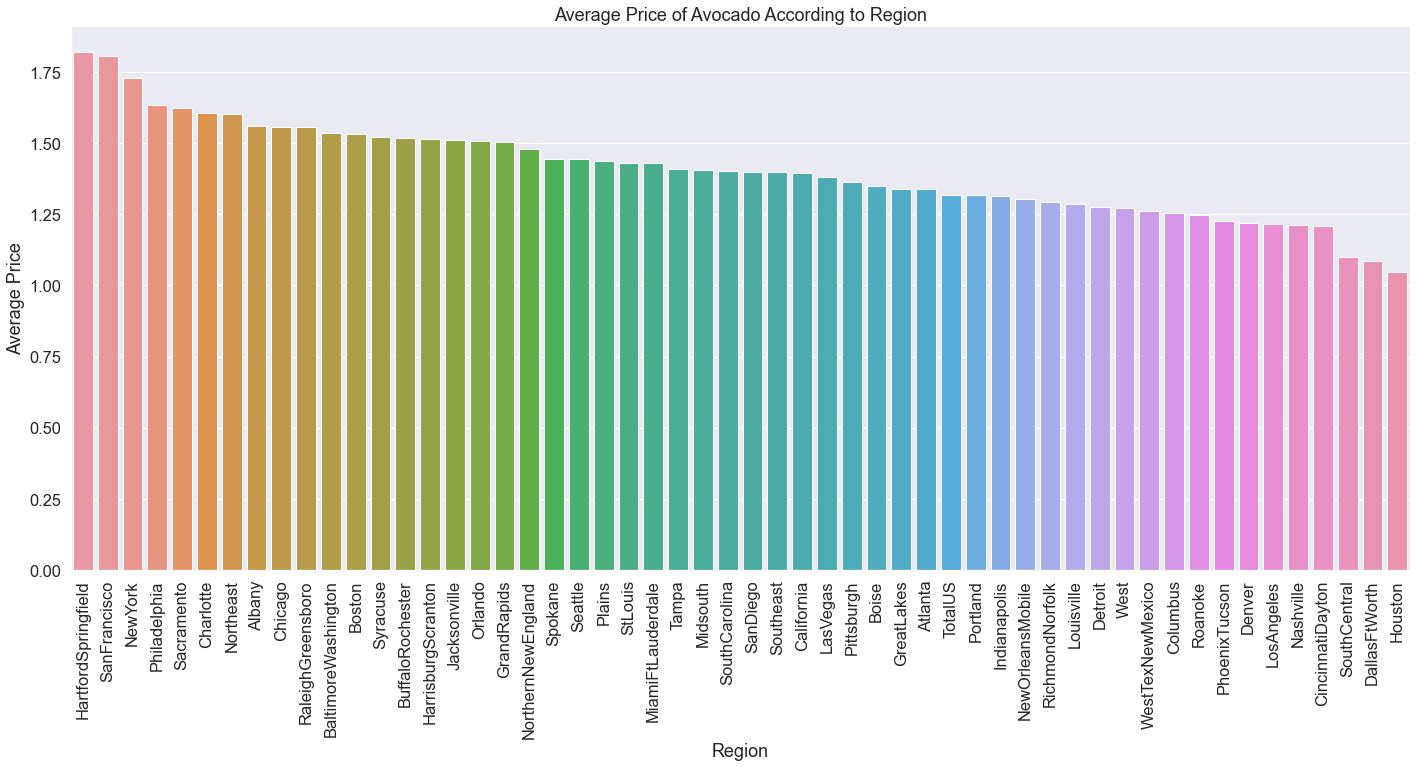

In [21]:

region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

According to the graph top 5 regions are:
    hartfordSpringfield
    SanFranscisco
    Newyork
    Philidelphia
    sacramento

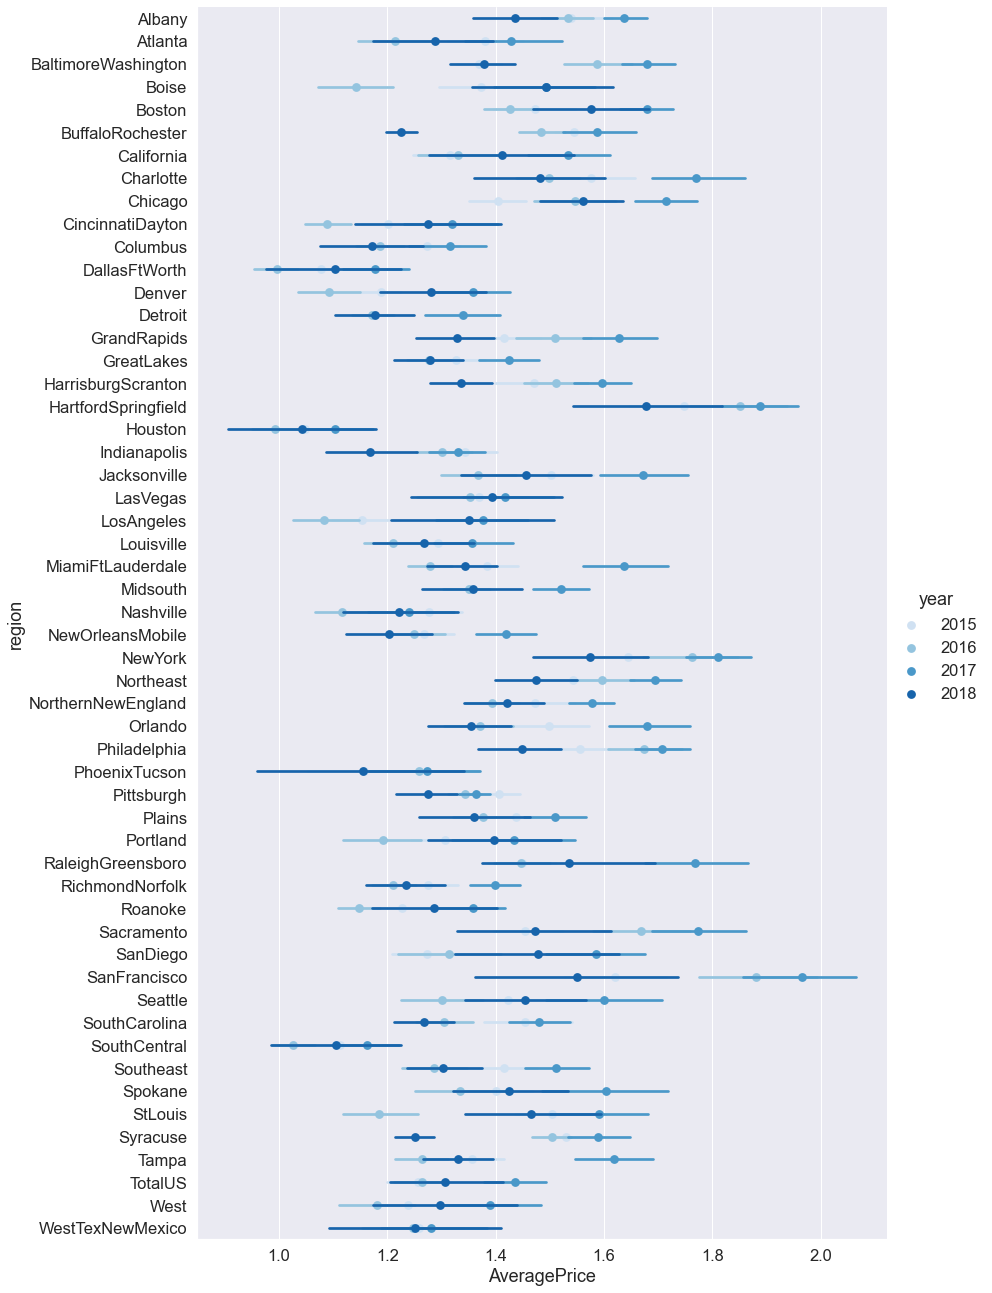

In [22]:
#Year which average price is high

sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

As the graph suggests in 2017 sanfrancisco is bit high the avg price

Text(0.5, 1.0, 'Average Price')

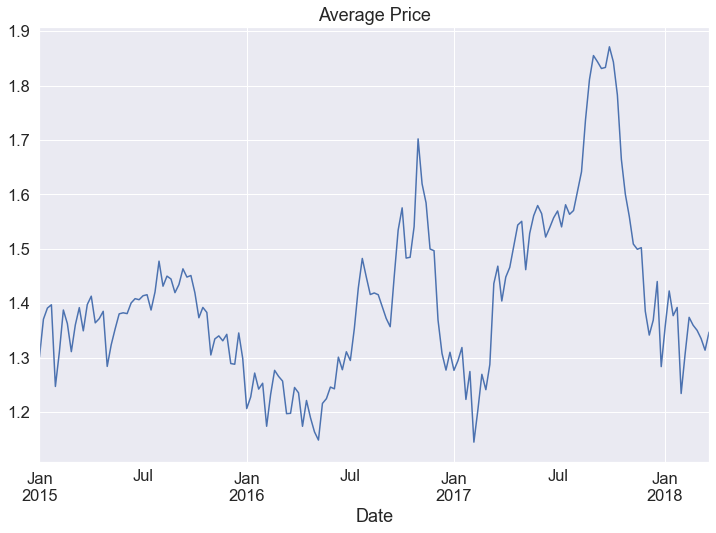

In [23]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')


 huge hike in prices after July 2017 and before Jan 2018

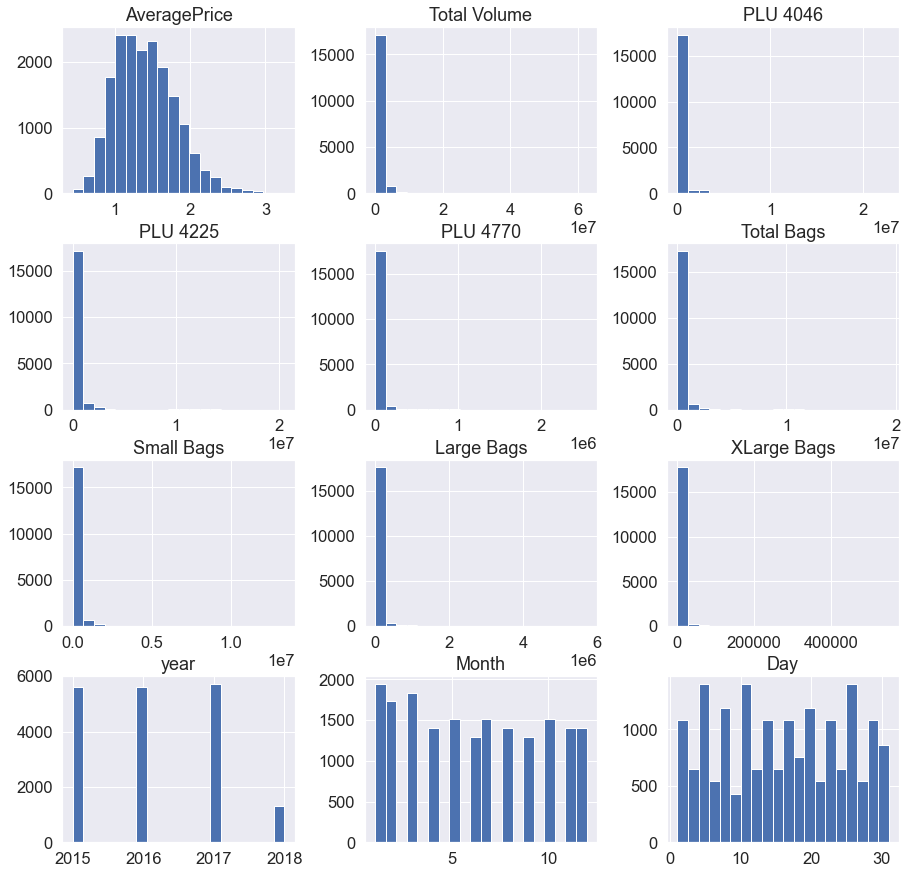

In [24]:
df.hist(bins=20,figsize=(15,15))
plt.show()

In [25]:
df.corr()

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
PLU 4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
PLU 4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
PLU 4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

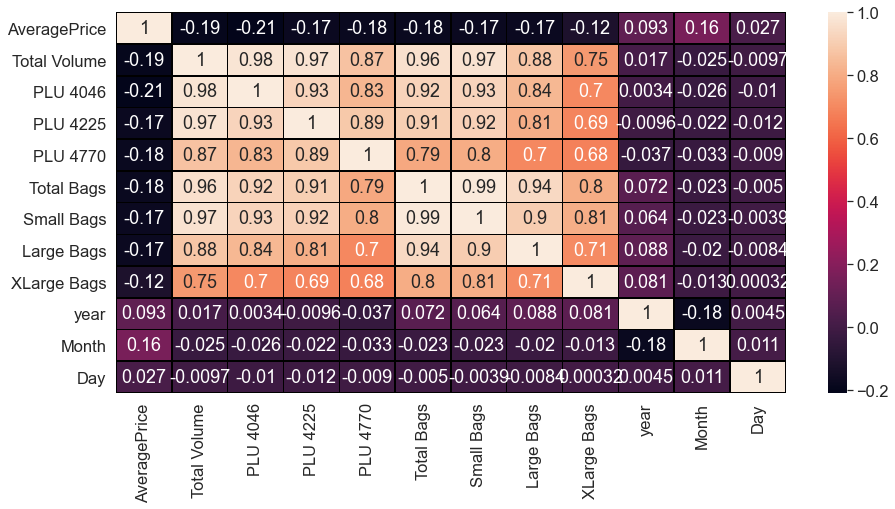

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black')

The graph shows that the average price is not correlated with all other variables and already we have year month and day so remove the date column

In [27]:
df['region'].nunique()

54

In [28]:
df['type'].nunique()

2

As the above two shows type and region unique values where type is easily converted but region its very difficult so better remove the region type

In [29]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)
df_final

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [30]:
print(df_final['type_organic'].value_counts())

0    9126
1    9123
Name: type_organic, dtype: int64


<AxesSubplot:>

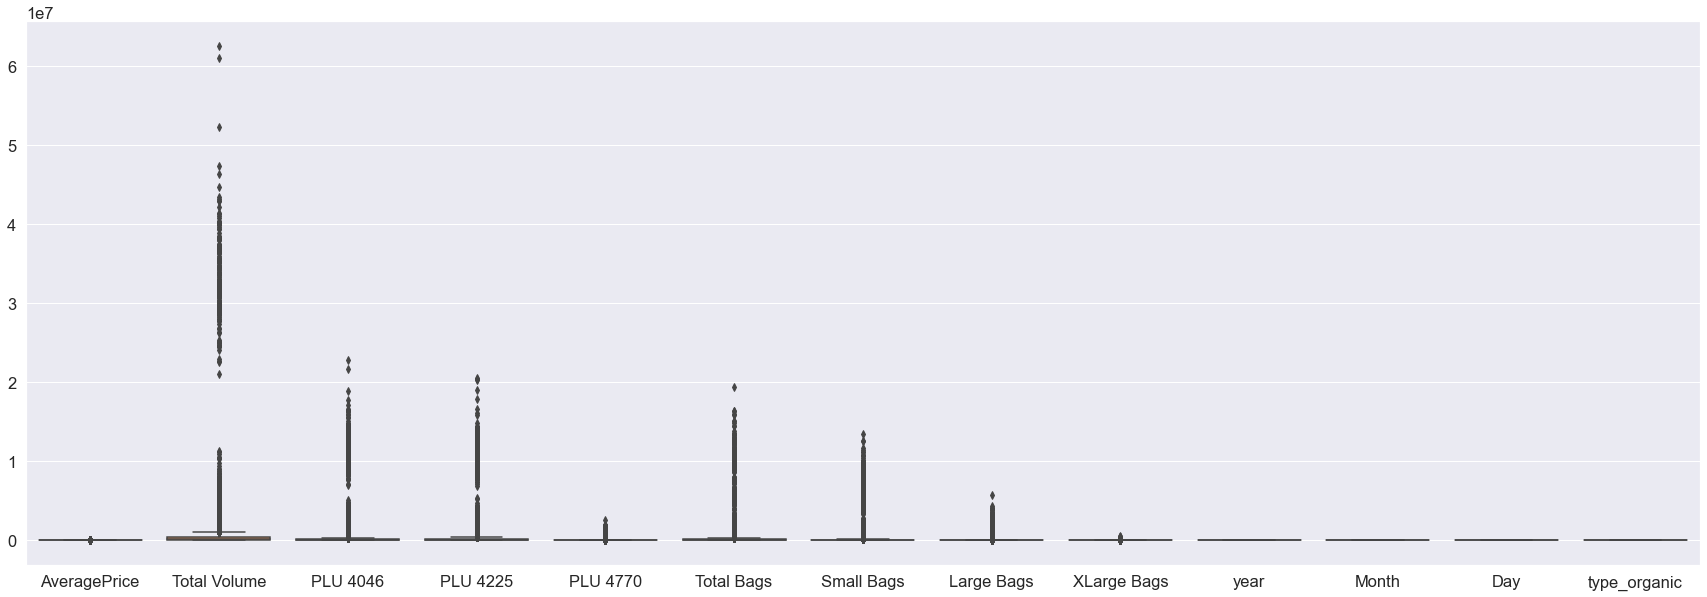

In [31]:
plt.figure(figsize=(30,10))

sns.boxplot(data=df_final)

In [32]:
#Remove the outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_final.iloc[:,1:]))
z

array([[0.22771641, 0.23081597, 0.1999022 , ..., 1.64763162, 1.29185687,
        0.99983562],
       [0.23042664, 0.23110251, 0.20805446, ..., 1.64763162, 0.49423066,
        0.99983562],
       [0.21208462, 0.23100731, 0.1544779 , ..., 1.64763162, 0.30339555,
        0.99983562],
       ...,
       [0.24233073, 0.2306933 , 0.24309014, ..., 1.46495942, 0.60817726,
        1.00016441],
       [0.24162464, 0.2304279 , 0.24265143, ..., 1.46495942, 0.18944895,
        1.00016441],
       [0.24125273, 0.22934712, 0.24317042, ..., 1.46495942, 0.98707516,
        1.00016441]])

In [33]:
threshold=3
print(np.where(z>3))

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64), array([1, 1, 7, ..., 6, 6, 6], dtype=int64))


In [34]:
df_new=df_final[(z<3) .all(axis=1)]
df_new

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [35]:
print(df_final.shape)
print(df_new.shape)

(18249, 13)
(17782, 13)


In [36]:
loss_percent=(18249-17782)/18249*100
print(loss_percent)

2.55904433119623


In [37]:
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
PLU 4046        4.928850
PLU 4225        4.472729
PLU 4770        5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
type_organic   -0.052210
dtype: float64

#Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags all are positively screwed

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

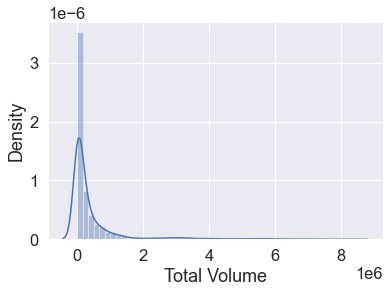

In [38]:
sns.distplot(df_new['Total Volume'])

<AxesSubplot:xlabel='PLU 4046', ylabel='Density'>

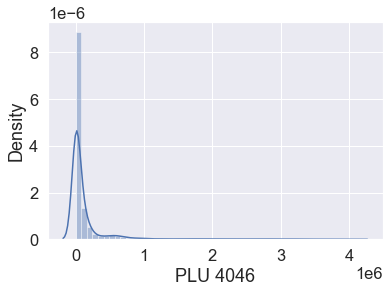

In [39]:
sns.distplot(df_new['PLU 4046'])

<AxesSubplot:xlabel='PLU 4225', ylabel='Density'>

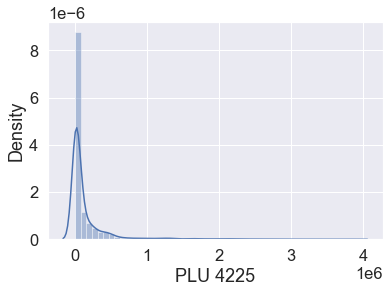

In [40]:
sns.distplot(df_new['PLU 4225'])

<AxesSubplot:xlabel='PLU 4770', ylabel='Density'>

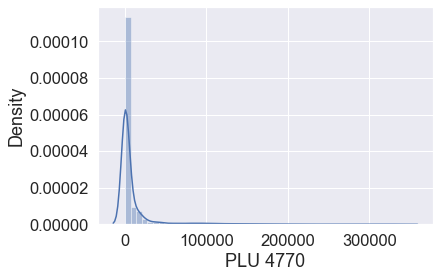

In [41]:
sns.distplot(df_new['PLU 4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

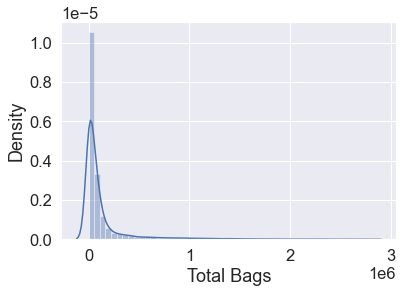

In [42]:
sns.distplot(df_new['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

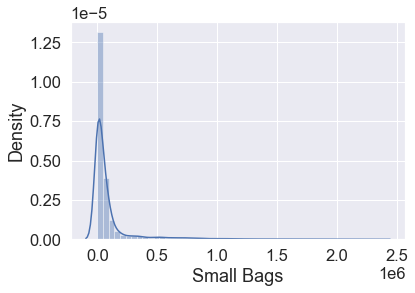

In [43]:
sns.distplot(df_new['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

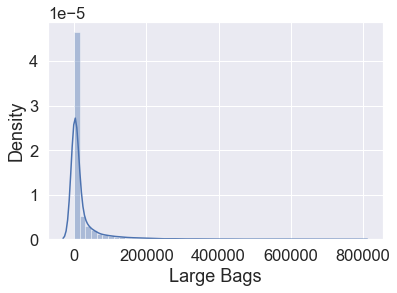

In [44]:
sns.distplot(df_new['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

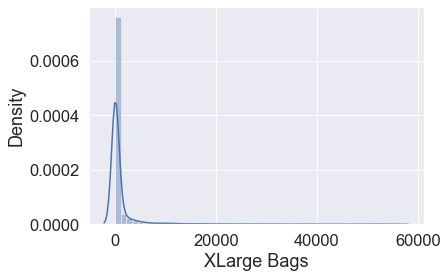

In [45]:
sns.distplot(df_new['XLarge Bags'])

In [46]:
x=df_new.drop(['AveragePrice'],axis=1)
y=df_new['AveragePrice']

In [47]:
x

,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [48]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17782, dtype: float64

In [49]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [50]:
x

array([[-0.0650939 , -0.64991752,  0.35827836, ...,  1.49171411,
         1.22751632, -1.02644331],
       [-0.13726861, -0.77006683,  0.27635525, ...,  1.49171411,
         0.53824989, -1.02644331],
       [ 0.21550256, -0.72450758,  0.65600965, ...,  1.49171411,
        -0.21875238, -1.02644331],
       ...,
       [-0.7663438 , -0.61035022, -0.77439502, ..., -1.64200449,
         0.64019997,  0.97423793],
       [-0.69259492, -0.53921073, -0.7116048 , ..., -1.64200449,
        -0.1051289 ,  0.97423793],
       [-0.65806205, -0.35150339, -0.78720881, ..., -1.64200449,
        -0.95756613,  0.97423793]])

In [51]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x=mn.fit_transform(x)
x

array([[0.56269631, 0.35747982, 0.58000219, ..., 1.        , 0.89346492,
        0.        ],
       [0.54889216, 0.33129115, 0.56392151, ..., 1.        , 0.69616027,
        0.        ],
       [0.61636327, 0.34122159, 0.63844385, ..., 1.        , 0.47946603,
        0.        ],
       ...,
       [0.42857506, 0.36610421, 0.3576698 , ..., 0.        , 0.7253438 ,
        1.        ],
       [0.4426803 , 0.38161032, 0.36999489, ..., 0.        , 0.5119911 ,
        1.        ],
       [0.44928506, 0.42252447, 0.35515458, ..., 0.        , 0.26797831,
        1.        ]])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [55]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2068827113308616
MSE: 0.06961996413276411
RMSE: 0.26385595337752776


RMSE is low so for linear Regression model is good

In [56]:
print(lr.coef_)
print(lr.intercept_)
print(lr.score(x_train,y_train))

[-1.5931645   0.15100515  1.42315355  0.10554463 -1.67992216  1.11150921
 -0.1276818   0.00280268  0.34322473  0.2633977   0.02252061  0.38489694]
1.4712003814305517
0.5651291331904473


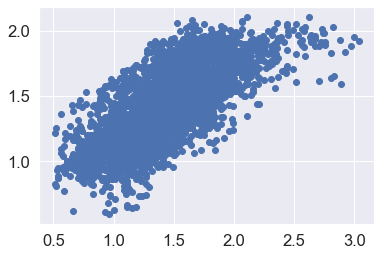

In [57]:
plt.scatter(x=y_test,y=pred)

Model 2 :Decision Tree Regression

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred1=dtr.predict(x_test)

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

MAE: 0.13635085746415518
MSE: 0.045074613438290695
RMSE: 0.21230782707731408


The RMSE of Decision Tree Regressor is less compare to Linear Regression

Text(0, 0.5, 'Predicted Y')

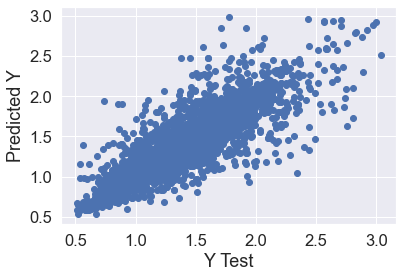

In [60]:

plt.scatter(x=y_test,y=pred1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [61]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred2=rdr.predict(x_test)

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

MAE: 0.10011110486364913
MSE: 0.020811247461343826
RMSE: 0.14426103930494827


In [63]:
#Gradient Booster Classifier
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred3=gbr.predict(x_test)

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, pred3))
print('MSE:', metrics.mean_squared_error(y_test, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))

MAE: 0.15798226647649002
MSE: 0.04296403667077466
RMSE: 0.20727768010756648


In [65]:
print(lr.score(x_train,y_train))
print(dtr.score(x_train,y_train))
print(rdr.score(x_train,y_train))
print(gbr.score(x_train,y_train))

0.5651291331904473
1.0
0.9817490531060754
0.7345142236166302


by comparing both score and RMSE random forest classifier model is good 

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

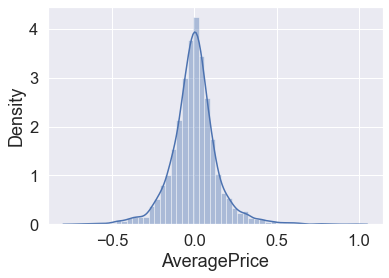

In [66]:
sns.distplot((y_test-pred2),bins=50)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

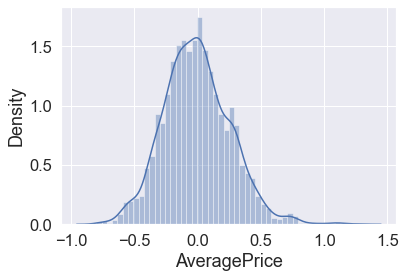

In [67]:
sns.distplot((y_test-pred),bins=50)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

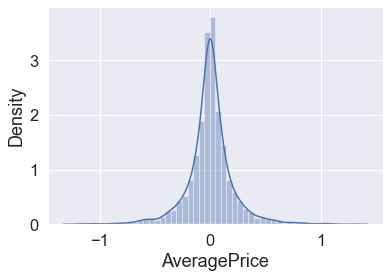

In [68]:
sns.distplot((y_test-pred1),bins=50)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

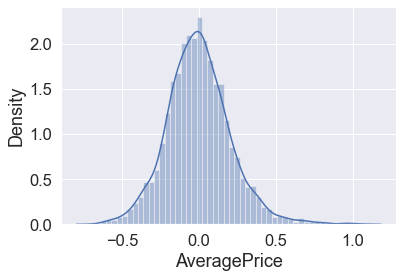

In [69]:
sns.distplot((y_test-pred3),bins=50)

comparatively with graph representation also random regressor give better output model

In [70]:
#cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [71]:
for i in range(2,10):
    score=cross_val_score(lr,x,y,cv=i)
    print("Value of:",i,score.mean())

Value of: 2 -3.372233386699272
Value of: 3 0.2310280478679375
Value of: 4 0.16988255669411498
Value of: 5 0.2287614094200622
Value of: 6 0.15830387822256878
Value of: 7 0.17317624048166955
Value of: 8 0.16167878262042268
Value of: 9 0.1763754277600136


In [72]:

score=cross_val_score(lr,x_train,y_train,cv=10)
score.mean()

0.5639027041514394

In [73]:
score=cross_val_score(dtr,x_train,y_train,cv=10)
score.mean()

0.7217407754809313

In [74]:
score=cross_val_score(rdr,x_train,y_train,cv=10)
score.mean()

0.8657083956165424

In [75]:
score=cross_val_score(gbr,x_train,y_train,cv=10)
score.mean()

0.7199485407323822

In [76]:
import pickle
filename="avacado.pkl"
pickle.dump(rdr,open(filename,'wb'))

In [77]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rdr.predict(x_test))
df_com=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [78]:
df_com

,orginal,predicted
0,1.35,1.3228
1,0.93,1.0077
2,1.45,1.5786
3,1.42,1.3914
4,0.94,1.1539
...,...,...
3552,1.60,1.6287
3553,1.68,1.5808
3554,1.60,1.6370
3555,2.00,1.9952


# Target Varaible as Region

In [79]:
df

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [80]:
df=df.drop(['Date'],axis=1)

In [81]:
df.shape

(18249, 14)

In [82]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [83]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])
    df

In [84]:
df

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,0,11,26
1,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,0,11,19
2,46,9388,3891,12864,2516,5616,5625,1328,0,0,0,0,11,12
3,61,8374,4545,11751,1789,4727,4880,1513,0,0,0,0,11,5
4,81,7540,4201,10157,1836,4874,4985,1855,0,0,0,0,10,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,116,5729,5810,3188,0,6785,6648,2676,0,1,3,53,1,3
18245,124,5233,4653,4757,0,5955,5864,2340,0,1,3,53,0,27
18246,140,5203,4654,3928,4712,5985,5961,818,0,1,3,53,0,20
18247,146,5616,5183,4402,4710,6360,6284,901,0,1,3,53,0,13


In [85]:
df.corr()

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.589341,-0.570148,-0.490201,-0.513770,-0.581311,-0.525067,-0.498835,-0.339222,0.615982,0.093216,-0.011796,0.162413,0.027363
Total Volume,-0.589341,1.000000,0.903278,0.940148,0.810884,0.952844,0.928842,0.708302,0.600745,-0.808491,0.085824,0.095988,-0.035493,-0.010503
PLU 4046,-0.570148,0.903278,1.000000,0.793995,0.741457,0.838443,0.826777,0.647191,0.562309,-0.748193,0.011444,0.184896,-0.034158,-0.008767
PLU 4225,-0.490201,0.940148,0.793995,1.000000,0.801623,0.857661,0.838541,0.639056,0.577395,-0.780779,0.006278,0.068547,-0.032171,-0.009521
PLU 4770,-0.513770,0.810884,0.741457,0.801623,1.000000,0.757695,0.767877,0.554446,0.624137,-0.748100,-0.055180,0.050078,-0.032137,-0.005098
Total Bags,-0.581311,0.952844,0.838443,0.857661,0.757695,1.000000,0.962575,0.758396,0.594852,-0.754928,0.205703,0.098432,-0.025145,-0.006285
Small Bags,-0.525067,0.928842,0.826777,0.838541,0.767877,0.962575,1.000000,0.612231,0.590193,-0.757381,0.180780,0.094037,-0.021219,-0.003366
Large Bags,-0.498835,0.708302,0.647191,0.639056,0.554446,0.758396,0.612231,1.000000,0.474620,-0.527684,0.180002,0.121728,-0.027568,-0.005700
XLarge Bags,-0.339222,0.600745,0.562309,0.577395,0.624137,0.594852,0.590193,0.474620,1.000000,-0.561368,0.160041,0.012659,-0.005383,0.004573
type,0.615982,-0.808491,-0.748193,-0.780779,-0.748100,-0.754928,-0.757381,-0.527684,-0.561368,1.000000,-0.000032,-0.000280,-0.000085,-0.000013


<AxesSubplot:>

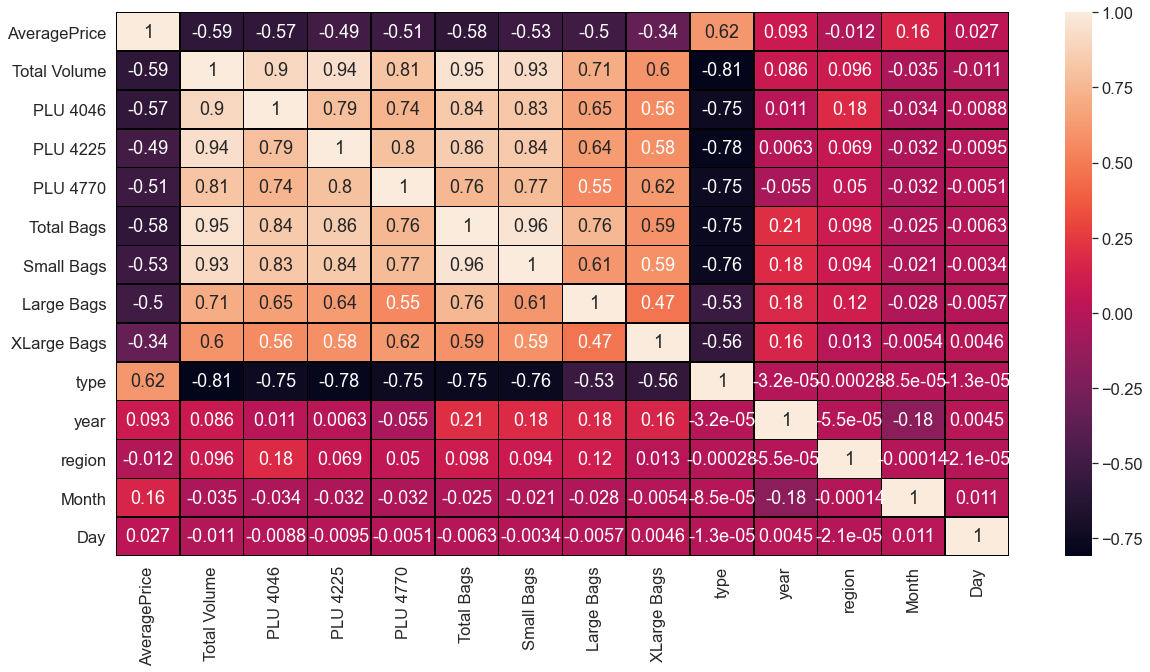

In [86]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black')

AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
PLU 4046         AxesSubplot(0.44569,0.749828;0.133621x0.130172)
PLU 4225        AxesSubplot(0.606034,0.749828;0.133621x0.130172)
PLU 4770        AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
type            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
year               AxesSubplot(0.125,0.437414;0.133621x0.130172)
region          AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Month            AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Day             AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

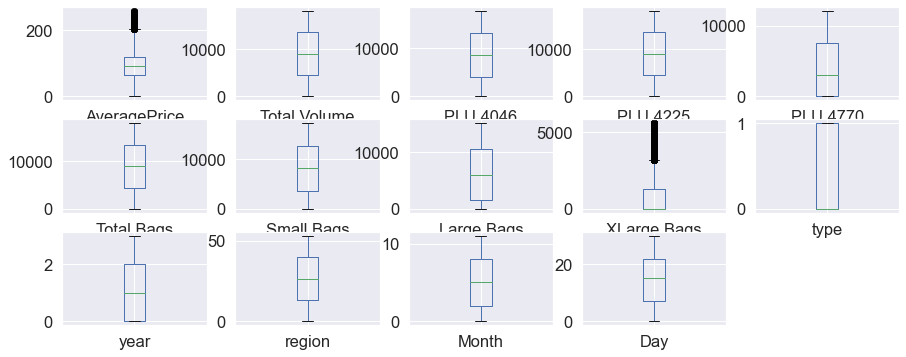

In [87]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))

In [88]:
from scipy.stats import zscore
import numpy as np

In [89]:
z=np.abs(zscore(df.loc[:,:]))
z

array([[0.18868869, 0.22480975, 0.80622027, ..., 1.7002522 , 1.64763162,
        1.29185687],
       [0.13900282, 0.27912775, 0.95279724, ..., 1.7002522 , 1.64763162,
        0.49423066],
       [1.18240612, 0.0519082 , 0.90024357, ..., 1.7002522 , 1.64763162,
        0.30339555],
       ...,
       [1.15282984, 0.74291995, 0.75443101, ..., 1.70081131, 1.46495942,
        0.60817726],
       [1.30188745, 0.66448171, 0.65333685, ..., 1.70081131, 1.46495942,
        0.18944895],
       [0.53175644, 0.63162502, 0.39286172, ..., 1.70081131, 1.46495942,
        0.98707516]])

In [90]:
threshold=3
print(np.where(z>3))

(array([11320, 11321, 11323, 11324, 11325, 11326, 11327, 11328, 11329,
       11330, 11331, 11332, 12821, 12823, 13033, 13035, 13037, 13038,
       13395, 13657, 13661, 14019, 14020, 14073, 14074, 14119, 14120,
       14121, 14122, 14123, 14124, 14125, 14126, 14128, 14129, 14177,
       14385, 14699, 14701, 14702, 14807, 14911, 14912, 14913, 14914,
       14915, 14916, 14917, 14918, 14919, 15124, 15125, 15127, 15128,
       15129, 15130, 15510, 15511, 15667, 15668, 15671, 15673, 15674,
       15814, 15871, 16024, 16050, 16055, 16395, 16399, 16421, 16660,
       16661, 16662, 16663, 16664, 16665, 16666, 16667, 16714, 16715,
       16717, 16718, 16719, 16720, 16721, 16734, 16737, 16738, 16985,
       16986, 16994, 16995, 16996, 16997, 16998, 16999, 17000, 17007,
       17008, 17009, 17010, 17015, 17017, 17031, 17032, 17033, 17034,
       17035, 17036, 17037, 17038, 17039, 17040, 17047, 17244, 17245,
       17246, 17247, 17248, 17249, 17250, 17251, 17255, 17300, 17301,
       17302, 17303

In [91]:
df_new1=df[(z<3) .all(axis=1)]
df_new1

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,0,11,26
1,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,0,11,19
2,46,9388,3891,12864,2516,5616,5625,1328,0,0,0,0,11,12
3,61,8374,4545,11751,1789,4727,4880,1513,0,0,0,0,11,5
4,81,7540,4201,10157,1836,4874,4985,1855,0,0,0,0,10,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,116,5729,5810,3188,0,6785,6648,2676,0,1,3,53,1,3
18245,124,5233,4653,4757,0,5955,5864,2340,0,1,3,53,0,27
18246,140,5203,4654,3928,4712,5985,5961,818,0,1,3,53,0,20
18247,146,5616,5183,4402,4710,6360,6284,901,0,1,3,53,0,13


In [92]:
print(df.shape)
print(df_new1.shape)

(18249, 14)
(18118, 14)


In [93]:
loss_percent=(18249-18118)/18249*100
print(loss_percent)

0.7178475532905912


In [94]:
df_new1.skew()

AveragePrice    0.400323
Total Volume   -0.009983
PLU 4046        0.006429
PLU 4225       -0.006789
PLU 4770        0.500235
Total Bags     -0.003095
Small Bags      0.037888
Large Bags      0.181088
XLarge Bags     1.599287
type            0.014794
year            0.224198
region          0.006878
Month           0.115642
Day             0.014846
dtype: float64

#XLarge Bags having highly skewed positively

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

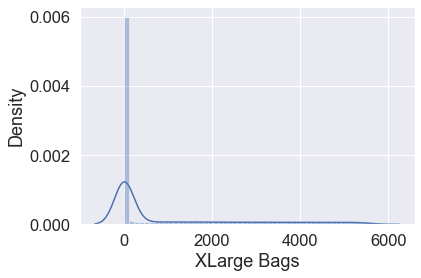

In [95]:
sns.distplot(df_new1['XLarge Bags'])

In [96]:
x1= df_new1.drop(['region','Day'], axis = 1)
y1=df_new1['region']

In [97]:
x1

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,11
1,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,11
2,46,9388,3891,12864,2516,5616,5625,1328,0,0,0,11
3,61,8374,4545,11751,1789,4727,4880,1513,0,0,0,11
4,81,7540,4201,10157,1836,4874,4985,1855,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,116,5729,5810,3188,0,6785,6648,2676,0,1,3,1
18245,124,5233,4653,4757,0,5955,5864,2340,0,1,3,0
18246,140,5203,4654,3928,4712,5985,5961,818,0,1,3,0
18247,146,5616,5183,4402,4710,6360,6284,901,0,1,3,0


In [98]:
y1

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18118, dtype: int32

In [99]:
print(y1.value_counts())

38    338
51    338
39    338
23    338
22    338
6     338
5     338
52    338
4     338
35    338
9     338
19    338
34    338
18    338
2     338
49    338
32    338
16    338
8     338
0     338
25    338
27    338
15    338
46    338
30    338
45    338
29    338
13    338
44    338
12    338
11    338
10    338
26    338
20    337
28    337
1     337
50    336
14    336
41    336
40    336
33    336
24    335
31    335
21    333
48    333
53    332
7     332
17    331
36    330
3     329
37    328
47    328
43    326
42    301
Name: region, dtype: int64


In [100]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method="yeo-johnson")

In [101]:
x1

array([[-0.08366724, -0.12425495, -0.68252574, ..., -0.99263119,
        -1.3051586 ,  1.47090794],
       [-0.03152475, -0.17770825, -0.85769918, ..., -0.99263119,
        -1.3051586 ,  1.47090794],
       [-1.25787524,  0.14000544, -0.79345482, ..., -0.99263119,
        -1.3051586 ,  1.47090794],
       ...,
       [ 1.19146654, -0.66111501, -0.62338354, ...,  1.00742351,
         1.69981455, -1.68436028],
       [ 1.31971924, -0.57541241, -0.51145542, ...,  1.00742351,
         1.69981455, -1.68436028],
       [ 0.63148497, -0.54005461, -0.24085186, ...,  1.00742351,
         1.69981455, -1.68436028]])

In [102]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x1=mn.fit_transform(x1)
x1

array([[0.56519558, 0.55189092, 0.41213899, ..., 0.        , 0.        ,
        1.        ],
       [0.5734903 , 0.53760319, 0.3646657 , ..., 0.        , 0.        ,
        1.        ],
       [0.37840486, 0.62252608, 0.38207639, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.76804137, 0.40839157, 0.42816696, ..., 1.        , 1.        ,
        0.        ],
       [0.78844356, 0.43129934, 0.4585003 , ..., 1.        , 1.        ,
        0.        ],
       [0.67896059, 0.44075026, 0.53183585, ..., 1.        , 1.        ,
        0.        ]])

In [103]:
print(x1.shape)
print(y1.shape)

(18118, 12)
(18118,)


In [104]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=42,test_size=0.20)

In [105]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14494, 12)
(14494,)
(3624, 12)
(3624,)


In [106]:
from imblearn.over_sampling import SMOTE

In [107]:
smt=SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [108]:
x_train

array([[0.56935244, 0.82658105, 0.88657141, ..., 0.        , 0.74244516,
        0.72133825],
       [0.53553835, 0.96162248, 0.81278153, ..., 0.        , 0.        ,
        0.27121776],
       [0.58579278, 0.20907074, 0.20730929, ..., 1.        , 0.42815572,
        0.14989302],
       ...,
       [0.8112365 , 0.31409461, 0.46955921, ..., 1.        , 0.        ,
        0.86305661],
       [0.3510966 , 0.89501226, 0.92474443, ..., 0.        , 1.        ,
        0.27121776],
       [0.67151448, 0.4517613 , 0.47561616, ..., 1.        , 0.74244516,
        0.64343608]])

In [109]:
y_train

0        41
1        29
2        39
3        49
4        46
         ..
15277    53
15278    53
15279    53
15280    53
15281    53
Name: region, Length: 15282, dtype: int32

In [110]:
np.bincount(y_train)

array([283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283,
       283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283,
       283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283,
       283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283,
       283, 283], dtype=int64)

In [111]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [112]:
print(lm.fit(x_train,y_train))
print(lm.score(x_train,y_train))

LogisticRegression()
0.4581861012956419


In [113]:
pred=lm.predict(x_test)
print("predicted result score:",pred)
print("actual score:",y_test)

predicted result score: [ 9 38 45 ... 10 29 15]
actual score: 12643    13
11106    38
14295    45
3073      5
5617      0
         ..
17082    44
13913    38
1368     26
16325    29
9004     43
Name: region, Length: 3624, dtype: int32


In [114]:
print("Accuracy_score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy_score: 0.4310154525386313
[[26  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  1]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ... 31 28  0]
 [ 0  2  0 ...  0  0 10]]
              precision    recall  f1-score   support

           0       0.31      0.44      0.36        59
           1       0.20      0.37      0.26        68
           2       0.72      0.41      0.53        75
           3       0.36      0.34      0.35        68
           4       0.40      0.38      0.39        74
           5       0.45      0.38      0.41        80
           6       0.56      0.70      0.62        64
           7       0.46      0.54      0.50        69
           8       0.60      0.74      0.66        77
           9       0.50      0.81      0.62        75
          10       0.20      0.19      0.20        62
          11       0.39      0.53      0.45        78
          12       0.45      0.58      0.51        65
          13       0.12      0.05      0.07        6

In [115]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lm_cv=GridSearchCV(lm,grid,cv=10)
lm_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lm_cv.best_params_)
print("accuracy :",lm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.5079833943411668


In [116]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [117]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [118]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy::',accuracy_score(y_test,pred))
    print('confusion matrix\n',confusion_matrix(y_test,pred)) 
    print('classification report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred,average='micro'))

In [119]:
fun(svc)

Accuracy:: 0.7406181015452539
confusion matrix
 [[56  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 58  1  0]
 [ 0  0  0 ...  7 42  0]
 [ 0  1  2 ...  0  0 33]]
classification report
               precision    recall  f1-score   support

           0       0.56      0.95      0.70        59
           1       0.45      0.50      0.47        68
           2       0.94      0.96      0.95        75
           3       0.72      0.74      0.73        68
           4       0.88      0.76      0.81        74
           5       0.83      0.66      0.74        80
           6       1.00      0.70      0.83        64
           7       0.79      0.75      0.77        69
           8       0.94      0.87      0.91        77
           9       0.66      0.84      0.74        75
          10       0.66      0.76      0.71        62
          11       0.79      0.81      0.80        78
          12       0.95      0.89      0.92        65
          13    

In [120]:
fun(dtc)

Accuracy:: 0.7969094922737306
confusion matrix
 [[44  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 70 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  1  1 ...  0  0 39]]
classification report
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        59
           1       0.60      0.65      0.62        68
           2       0.86      0.93      0.90        75
           3       0.71      0.79      0.75        68
           4       0.80      0.92      0.86        74
           5       0.81      0.76      0.79        80
           6       0.95      0.92      0.94        64
           7       0.87      0.80      0.83        69
           8       0.97      0.87      0.92        77
           9       0.71      0.72      0.72        75
          10       0.65      0.60      0.62        62
          11       0.93      0.85      0.89        78
          12       0.79      0.89      0.84        65
          13    

In [121]:
fun(knn)

Accuracy:: 0.7971854304635762
confusion matrix
 [[56  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 69 ...  0  0  0]
 ...
 [ 0  0  0 ... 53  3  0]
 [ 0  0  0 ...  7 45  0]
 [ 0  1  4 ...  0  0 45]]
classification report
               precision    recall  f1-score   support

           0       0.70      0.95      0.81        59
           1       0.69      0.81      0.74        68
           2       0.84      0.92      0.88        75
           3       0.75      0.69      0.72        68
           4       0.94      0.89      0.92        74
           5       0.90      0.76      0.82        80
           6       0.73      0.91      0.81        64
           7       0.84      0.83      0.83        69
           8       0.97      0.86      0.91        77
           9       0.72      0.83      0.77        75
          10       0.77      0.74      0.75        62
          11       0.82      0.87      0.84        78
          12       0.92      0.83      0.87        65
          13    

In [122]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"splitter":['best','random'],"max_features":['auto', 'sqrt', 'log2']}
grid_search_cv = GridSearchCV(dtc,param_grid=params)
grid_search_cv.fit(x1,y1)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
0.4875178297350932


In [123]:
params={'kernel':['linear','rbf','poly','sigmoid']}
grid_search_cv = GridSearchCV(svc,param_grid=params,cv=10,verbose=1,n_jobs=-1)
grid_search_cv.fit(x1,y1)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'kernel': 'poly'}
SVC(kernel='poly')
0.7193827456200336


In [124]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors":[7,5,11],"weights":['uniform','distance'],"algorithm":['auto', 'brute']}
grid_search_cv = GridSearchCV(knn,param_grid=params)
grid_search_cv.fit(x1,y1)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(weights='distance')
0.4664960313035616


In [125]:
# Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [126]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
ad=AdaBoostClassifier()

In [127]:
fun(rf)

Accuracy:: 0.9114238410596026
confusion matrix
 [[57  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  1 66  0]
 [ 0  0  0 ...  0  0 51]]
classification report
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        59
           1       0.83      0.81      0.82        68
           2       0.99      0.99      0.99        75
           3       0.84      0.87      0.86        68
           4       0.95      0.99      0.97        74
           5       0.89      0.79      0.83        80
           6       0.95      0.98      0.97        64
           7       0.95      0.88      0.92        69
           8       0.99      0.99      0.99        77
           9       0.92      0.88      0.90        75
          10       0.89      0.87      0.88        62
          11       1.00      0.96      0.98        78
          12       0.98      0.97      0.98        65
          13    

In [128]:
fun(ad)

Accuracy:: 0.0739514348785872
confusion matrix
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  1]
 [ 0  0  0 ... 34  0  0]
 ...
 [ 0  0  0 ... 55  0  0]
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  1  0  1]]
classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.00      0.00      0.00        68
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00        74
           5       0.00      0.00      0.00        80
           6       0.00      0.00      0.00        64
           7       0.06      1.00      0.11        69
           8       0.00      0.00      0.00        77
           9       0.00      0.00      0.00        75
          10       0.00      0.00      0.00        62
          11       0.00      0.00      0.00        78
          12       0.00      0.00      0.00        65
          13    

In [129]:
#cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [130]:
for i in range(2,10):
    score=cross_val_score(lm,x1,y1,cv=i)
    print('At Value of',i,score.mean())

At Value of 2 0.024119660006623248
At Value of 3 0.24042922621795706
At Value of 4 0.26333557057120727
At Value of 5 0.32051522374527713
At Value of 6 0.30302301757741806
At Value of 7 0.34949673282714094
At Value of 8 0.34463561045717983
At Value of 9 0.36218513240018446


In [131]:
score=cross_val_score(lm,x1,y1,cv=10)
score.mean()

0.3625709577112154

In [132]:
score=cross_val_score(dtc,x1,y1,cv=10)
score.mean()

0.6278769489372646

In [133]:
score=cross_val_score(svc,x1,y1,cv=10)
score.mean()

0.6313021174256414

In [134]:
score=cross_val_score(knn,x1,y1,cv=10)
score.mean()

0.4859779212879838

In [135]:
score=cross_val_score(rf,x1,y1,cv=10)
score.mean()

0.7713242168596862

In [136]:
score=cross_val_score(ad,x1,y1,cv=10)
score.mean()

0.05270867387549474

In [137]:
import pickle
filename="avacado.pkl"
pickle.dump(rf,open(filename,'wb'))

In [138]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [139]:
df_com

,orginal,predicted
0,13,9
1,38,38
2,45,45
3,5,5
4,0,0
...,...,...
3619,44,44
3620,38,38
3621,26,26
3622,29,29


As per the model for both regressor and classification random forest giving better output percentage..so i will suggest random forest for testing the model